In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix,classification_report,accuracy_score,precision_score, recall_score, f1_score
from warnings import simplefilter
from sklearn.tree import DecisionTreeClassifier,plot_tree
simplefilter(action='ignore', category=FutureWarning)
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

Decision tree algorithm for detecting diabites based on The Behavioral Risk Factor Surveillance System data

In [7]:
data=pd.read_csv('diabetes_binary_health_indicators_BRFSS2015.csv')
X = data.drop('Diabetes_binary', axis=1)
y = data['Diabetes_binary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
max_depths = np.arange(1, 20)

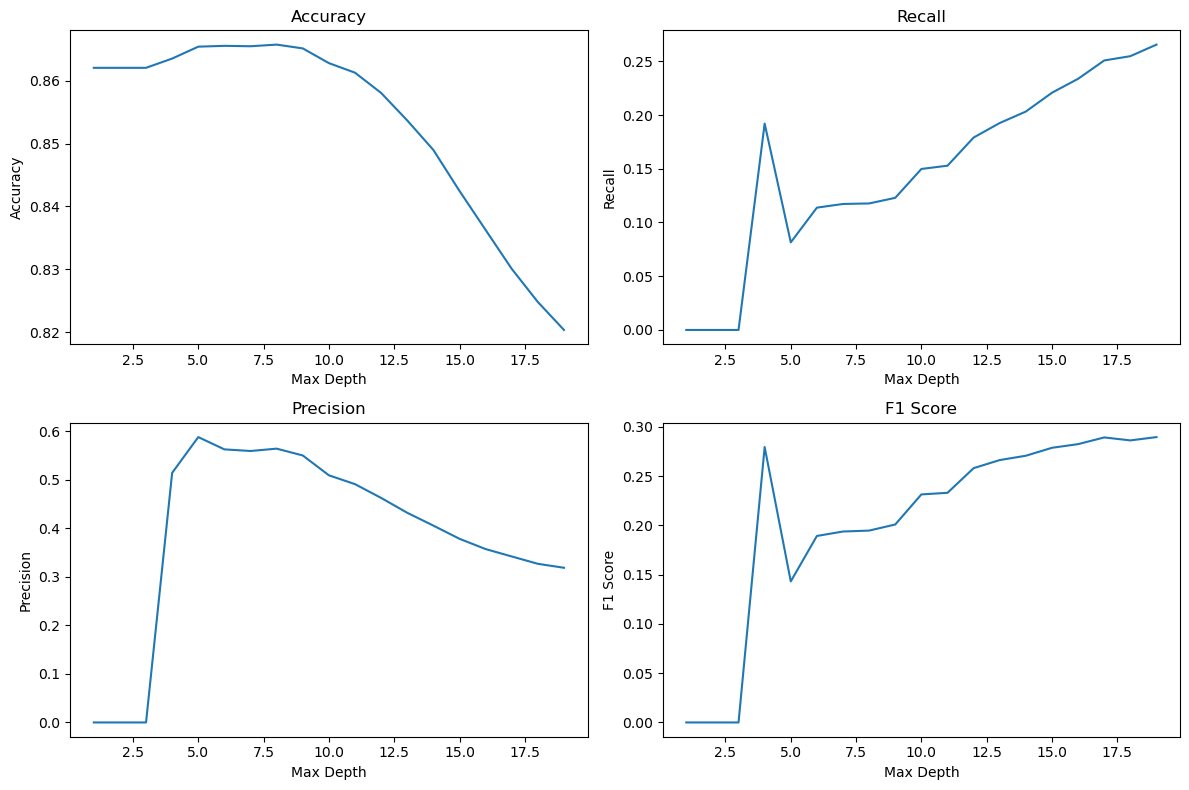

In [8]:
accuracy_scores = []
recall_scores = []
precision_scores = []
f1_scores = []

for depth in max_depths:
    clf = DecisionTreeClassifier(random_state=42, max_depth=depth)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    accuracy_scores.append(accuracy_score(y_test, y_pred))
    recall_scores.append(recall_score(y_test, y_pred,zero_division=0))
    precision_scores.append(precision_score(y_test, y_pred,zero_division=0))
    f1_scores.append(f1_score(y_test, y_pred,zero_division=0))

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(max_depths, accuracy_scores)
plt.title('Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')

plt.subplot(2, 2, 2)
plt.plot(max_depths, recall_scores)
plt.title('Recall')
plt.xlabel('Max Depth')
plt.ylabel('Recall')

plt.subplot(2, 2, 3)
plt.plot(max_depths, precision_scores)
plt.title('Precision')
plt.xlabel('Max Depth')
plt.ylabel('Precision')

plt.subplot(2, 2, 4)
plt.plot(max_depths, f1_scores)
plt.title('F1 Score')
plt.xlabel('Max Depth')
plt.ylabel('F1 Score')

plt.tight_layout()
plt.show()


Decision tree algorithm for detecting diabites based on The Behavioral Risk Factor Surveillance System data with synthetic data created using SMOTE

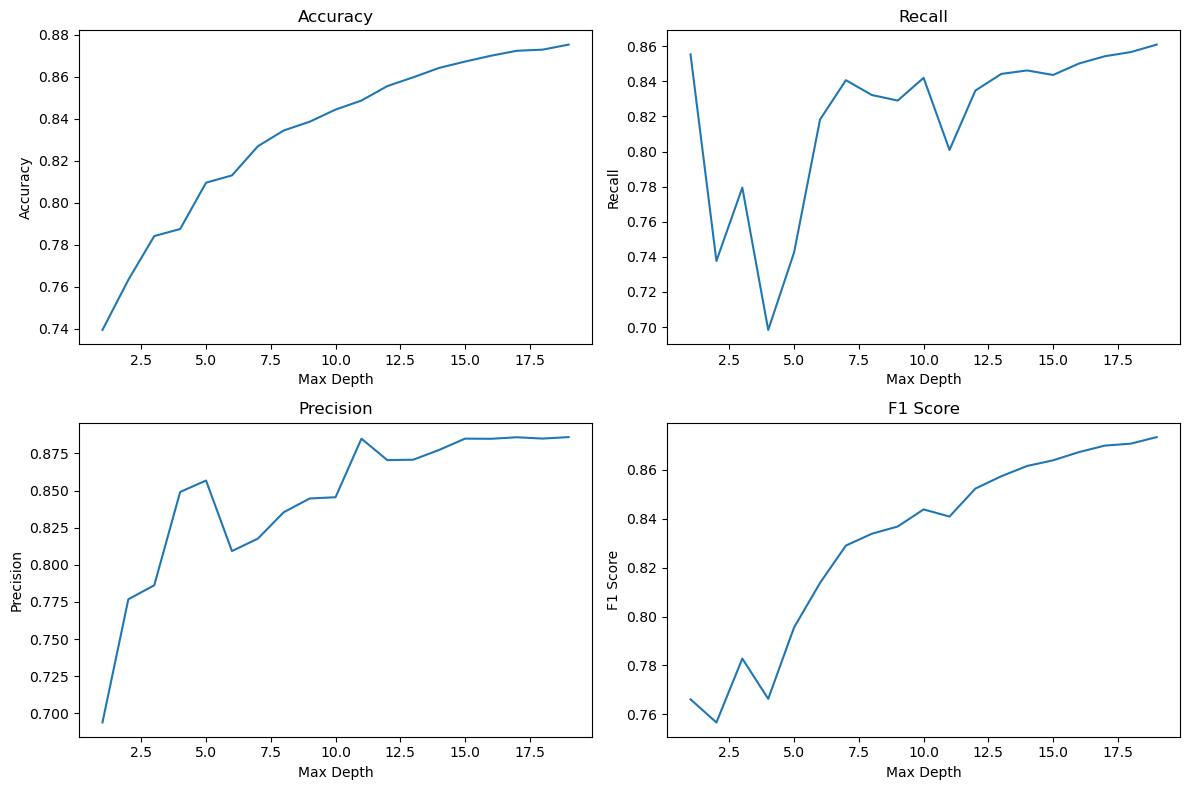

In [9]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

accuracy_scores = []
recall_scores = []
precision_scores = []
f1_scores = []

for depth in max_depths:
    clf = DecisionTreeClassifier(random_state=42, max_depth=depth)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    accuracy_scores.append(accuracy_score(y_test, y_pred))
    recall_scores.append(recall_score(y_test, y_pred,zero_division=0))
    precision_scores.append(precision_score(y_test, y_pred,zero_division=0))
    f1_scores.append(f1_score(y_test, y_pred,zero_division=0))

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(max_depths, accuracy_scores)
plt.title('Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')

plt.subplot(2, 2, 2)
plt.plot(max_depths, recall_scores)
plt.title('Recall')
plt.xlabel('Max Depth')
plt.ylabel('Recall')

plt.subplot(2, 2, 3)
plt.plot(max_depths, precision_scores)
plt.title('Precision')
plt.xlabel('Max Depth')
plt.ylabel('Precision')

plt.subplot(2, 2, 4)
plt.plot(max_depths, f1_scores)
plt.title('F1 Score')
plt.xlabel('Max Depth')
plt.ylabel('F1 Score')

plt.tight_layout()
plt.show()
